In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#Cleaning text
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to C:\Users\Temor AL-
[nltk_data]     Kaisi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
items = pd.read_csv("20191226-items.csv")
reviews = pd.read_csv("20191226-reviews.csv")

reviews['body'][0]
type(reviews)

pandas.core.frame.DataFrame

In [3]:
# 0.4 Link review data to item data bsed on common column "asin"
reviews = pd.merge(reviews, items, how="left", left_on="asin", right_on="asin")
reviews.head()
print(reviews['brand'])

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
67981       Sony
67982       Sony
67983       Sony
67984      Apple
67985    Samsung
Name: brand, Length: 67986, dtype: object


In [4]:
# 0.5 Rename columns
reviews.rename(columns={"rating_x": "rating", "title_x": "title", "title_y": "item_title", "rating_y": "overall_rating", "body": "Review"}, inplace=True)
#reviews["id"] = reviews.index + 1
reviews.head(15)

,asin,name,rating,date,verified,title,Review,helpfulVotes,brand,item_title,url,image,overall_rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
5,B0000SX2UC,J. White,4,"September 25, 2005",False,Worked great for me,"Hello, I have this phone and used it until I d...",NaN,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
6,B0000SX2UC,the cell phone store owner,5,"April 16, 2004",False,Wanna cool Nokia? You have it here!,Cool. Cheap. Color: 3 words that describe the ...,2.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
7,B0000SX2UC,Matt,4,"April 3, 2004",False,Problem with 3588i universal headset,"The 3599i is overall a nice phone, except that...",2.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
8,B0000SX2UC,Charles Cook,5,"November 24, 2003",False,cool phone!!!!!!!!,"I've never owned a Nokia phone before, so this...",7.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
9,B0000SX2UC,Amazon Customer,3,"February 2, 2004",False,Pissed off-a little bit,ok well im in school and i need the text messa...,3.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0


In [5]:
# Check for any nulls values
reviews.isnull().sum()

asin                  0
name                  2
rating                0
date                  0
verified              0
title                14
Review               21
helpfulVotes      40771
brand               200
item_title            0
url                   0
image                 0
overall_rating        0
reviewUrl             0
totalReviews          0
price                 0
originalPrice         0
dtype: int64

In [6]:
reviews# Remove null values and unneeded features
reviews = reviews.dropna()
#reviews = reviews.drop(['Id','ProductId','UserId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator',
                        #'Score','Time'], 1)
reviews = reviews.reset_index(drop=True)

In [7]:
# Check for any nulls values
reviews.isnull().sum()

asin              0
name              0
rating            0
date              0
verified          0
title             0
Review            0
helpfulVotes      0
brand             0
item_title        0
url               0
image             0
overall_rating    0
reviewUrl         0
totalReviews      0
price             0
originalPrice     0
dtype: int64

In [8]:
samsung = reviews[reviews["brand"]=="Samsung"].sort_values(by=["date"], ascending=False)

In [9]:
samsung.dropna(inplace=True)
samsung[reviews['rating'] != 3]
samsung['Positivity'] = np.where(samsung['rating'] > 3, 1, 0)
cols = ['asin', 'name', 'rating', 'date', 'verified', 'Review', 'helpfulVotes', 'brand', 'item_title','url','image','overall_rating','reviewUrl','totalReviews','price','originalPrice']
samsung.drop(cols, axis=1, inplace=True)
samsung.head()

C:\Users\Temor AL-Kaisi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,title,Positivity
23365,So far all good after 5 month,1
23045,This was the best place to get a good working ...,1
25548,Really satisfying,1
23304,So far all good after 5 month,1
9655,Not compatable with Verizon carrier,0


In [12]:
samsung = samsung.dropna(how='any',axis=0)
# 0.5 Rename columns
samsung.rename(columns={"title": "Review"}, inplace=True)
samsung.to_csv (r'samsung_title.csv', index = False, header=True)
df_samsung_title = pd.read_csv("samsung_new.csv")
df_samsung_title

,Review,Positivity
0,I bought this phone because i needed a phone t...,0
1,Works like new.,1
2,I was torn between getting an S8 used or a Not...,1
3,The box came with the phone and a charger. I w...,1
4,Overall the phone is great. It came in with Sp...,1
...,...,...
12556,Exactly as promised. Was worried I wouldn't be...,1
12557,"Great phone, bought it to replace my galaxy no...",1
12558,"TOP DOG! IMO, best phone out there. Great for ...",1
12559,I bought two of these from Amazon. I am curren...,1


In [13]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('wordnet')
import string
stop = set(stopwords.words('english'))
punc = set(string.punctuation)
keywords = samsung["Review"].apply(lambda x: x.lower()).unique().tolist()
keywords.append("phone")
lemma = WordNetLemmatizer()
def clean_text(text):
    # Convert the text into lowercase
    text = text.lower()
    # Split into list
    wordList = text.split()
    # Remove punctuation
    wordList = ["".join(x for x in word if (x=="'")|(x not in punc)) for word in wordList]
    # Remove stopwords
    wordList = [word for word in wordList if word not in stop]
 # Remove other keywords
    wordList = [word for word in wordList if word not in keywords]
    # Lemmatisation
    wordList = [lemma.lemmatize(word) for word in wordList]
    return " ".join(wordList)

[nltk_data] Downloading package wordnet to C:\Users\Temor AL-
[nltk_data]     Kaisi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
# 1.2 Apply preprocess function to the dataframe
samsung["Review"] = samsung["Review"].astype("str")
samsung["clean_text"] = samsung["Review"].apply(clean_text)




In [15]:


# Re-order Columns
samsung = samsung[['clean_text','Positivity']]

samsung.to_csv (r'samsung_s_title.csv', index = False, header=True)
df_samsungs_title = pd.read_csv("samsung_s_title.csv")

df_samsungs_title 

,clean_text,Positivity
0,far 5 month,1
1,best place get working,1
2,really satisfying,1
3,far 5 month,1
4,compatable verizon carrier,0
...,...,...
12556,five star,1
12557,beast,1
12558,rule,1
12559,solid,1


In [18]:
# 0.5 Rename columns
df_samsungs_title.rename(columns={"clean_text": "Review"}, inplace=True)
df_samsungs_title["Review"] = df_samsungs_title["Review"].astype("str")

In [19]:
# Step 2: Create a wordcloud
# 2.1 Define word frequency function
def word_freq_dict(text):
    # Convert text into word list
    wordList = text.split()
    # Generate word freq dictionary
    wordFreqDict = {word: wordList.count(word) for word in wordList}
    return wordFreqDict
word_freq_dict("I love reading books. I love music.")

{'I': 2, 'love': 2, 'reading': 1, 'books.': 1, 'music.': 1}

In [20]:
# 2.3 Initializer
from wordcloud import WordCloud, ImageColorGenerator

# Define a function to create a wordcloud from dictionary of word frequency
def wordcloud_from_frequency(word_freq_dict, title, figure_size=(10, 6)):
    wordcloud.generate_from_frequencies(word_freq_dict)
    plt.figure(figsize=figure_size)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(title)
    plt.show()
    
# Define a function to plot top10 positive words and top10 negative words in a grouped bar plot (from dictionaries)
def topn_wordfreq_bar_both(pos_word_freq_dict, neg_word_freq_dict, pos_num_doc, neg_num_doc, topn, title, palette, height=6, aspect=2):
    # Transform positive word frequency into DF
    df_pos = pd.DataFrame.from_dict(pos_word_freq_dict, orient="index").sort_values(by=0, ascending=False).head(topn)
    df_pos.columns = ["frequency"]
    df_pos["frequency"] = df_pos["frequency"] / pos_num_doc
    df_pos["label"] = "Positive"
    # Transform negative word frequency into DF
    df_neg = pd.DataFrame.from_dict(neg_word_freq_dict, orient="index").sort_values(by=0, ascending=False).head(topn)
    df_neg.columns = ["frequency"]
    df_neg["frequency"] = df_neg["frequency"] / neg_num_doc
    df_neg["label"] = "Negative"
    # Append two dataframes
    df_append = df_pos.append(df_neg)
    df_append.reset_index(inplace=True)
    # Plot
    sns.catplot(x="index", y="frequency", hue="label", data=df_append, 
                kind="bar",
                palette=palette,
                height=height, aspect=aspect, 
                legend_out=False)
    plt.title(title)
    plt.show()

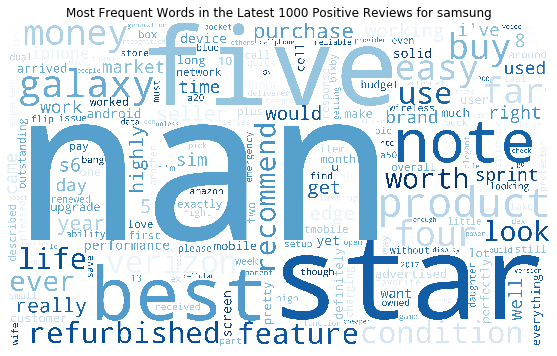

In [22]:
# 2.4 Plot wordclouds for latest 1000 reviews for Apple
samsung_pos = " ".join(df_samsungs_title[df_samsungs_title["Positivity"]==1]["Review"][0:1000])
samsung_pos_word_freq = word_freq_dict(samsung_pos)
wordcloud = WordCloud(width=5000, 
                      height=3000, 
                      max_words=200, 
                      colormap="Blues",
                      background_color="white")
wordcloud_from_frequency(samsung_pos_word_freq, "Most Frequent Words in the Latest 1000 Positive Reviews for samsung")

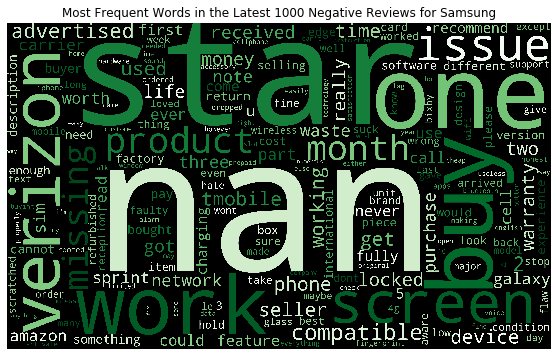

In [23]:
samsung_neg = " ".join(df_samsungs_title[df_samsungs_title["Positivity"]==0]["Review"][0:1000])
samsung_neg_word_freq = word_freq_dict(samsung_neg)
wordcloud = WordCloud(width=5000, 
                      height=3000, 
                      max_words=200, 
                      colormap="Greens",
                      background_color="black")
wordcloud_from_frequency(samsung_neg_word_freq, "Most Frequent Words in the Latest 1000 Negative Reviews for Samsung")

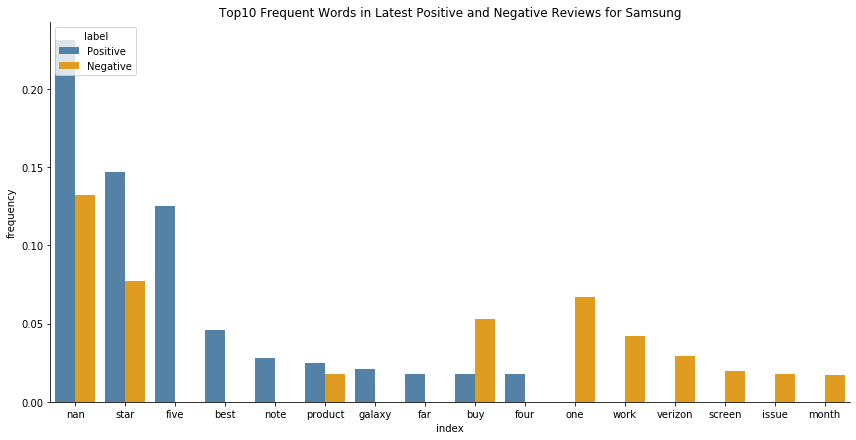

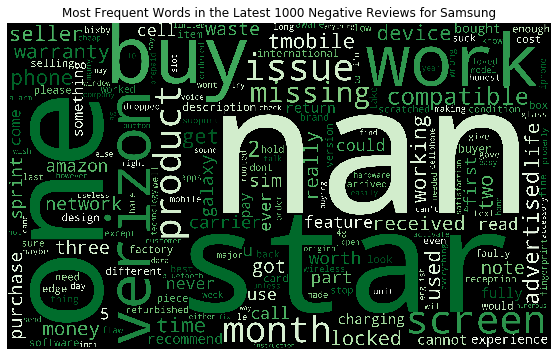

In [24]:
topn_wordfreq_bar_both(samsung_pos_word_freq, samsung_neg_word_freq, 
                       min(sum(df_samsungs_title["Positivity"]==1), 1000), 
                       min(sum(df_samsungs_title["Positivity"]==0), 1000), 
                       10, 
                       "Top10 Frequent Words in Latest Positive and Negative Reviews for Samsung", 
                       ["steelblue", "orange"], 
                       height=6, aspect=2)
wordcloud_from_frequency(samsung_neg_word_freq, "Most Frequent Words in the Latest 1000 Negative Reviews for Samsung")

In [25]:
corpus = []
for i in range(0,12561):
    review = re.sub('[^a-zA-Z]', ' ',df_samsungs_title['Review'][i])
    review = review.lower()
    corpus.append(review)

In [26]:
corpus

['far   month',
 'best place get working',
 'really satisfying',
 'far   month',
 'compatable verizon carrier',
 'nan',
 'refurbished viable alternative',
 'a   buy',
 'buying phone online',
 'money',
 'nan',
 'delivery product',
 'nan',
 'factory',
 'deserves every penny',
 'nan',
 'pick',
 'nan',
 'note  crashed   month way fix ship  weeks',
 'come instruction numerous missing item',
 'nan',
 'come instruction numerous missing item',
 'caution buying',
 'unknown ask anything',
 'well game use',
 'five star',
 'five star',
 'five star',
 'get depleted faster ex iphone ',
 'four star',
 'seller',
 'nan',
 'never buy',
 'fact   inch ',
 'life hype',
 'screen protector',
 'antenna compromised unable activate ',
 'getting data work abroad',
 'unit overall find one',
 'five star',
 'five star',
 'five star',
 'screen gone kaput le one month use video included',
 'one star',
 'five star',
 'truly',
 'best i ve ever used period',
 'nan',
 'nan',
 'nan',
 'nan',
 'straight talk',
 'don t came

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
y = df_samsungs_title.iloc[:,1] 

In [29]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[ 640  414]
 [ 218 1241]]


In [30]:
(640 + 1241)/2512.2

0.7487461189395749

In [31]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.748507759649821
Precision: 0.7498489425981874
Recall: 0.8505825908156271


Text(0.5, 257.44, 'Predicted label')

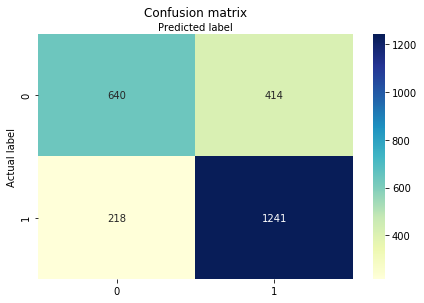

In [32]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
ax.set_ylim(2, 0)
plt.xlabel('Predicted label')